In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import joblib
from IPython.display import FileLink

In [45]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [46]:
df = pd.read_csv(url, header=None, names=columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
# eda

print("Dataset Info:\n")
print(df.info())

print("\nDescriptive Statistics:\n")
print(df.describe())

print("\nClass Distribution:\n")
print(df['Outcome'].value_counts())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Descriptive Statistics:

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105

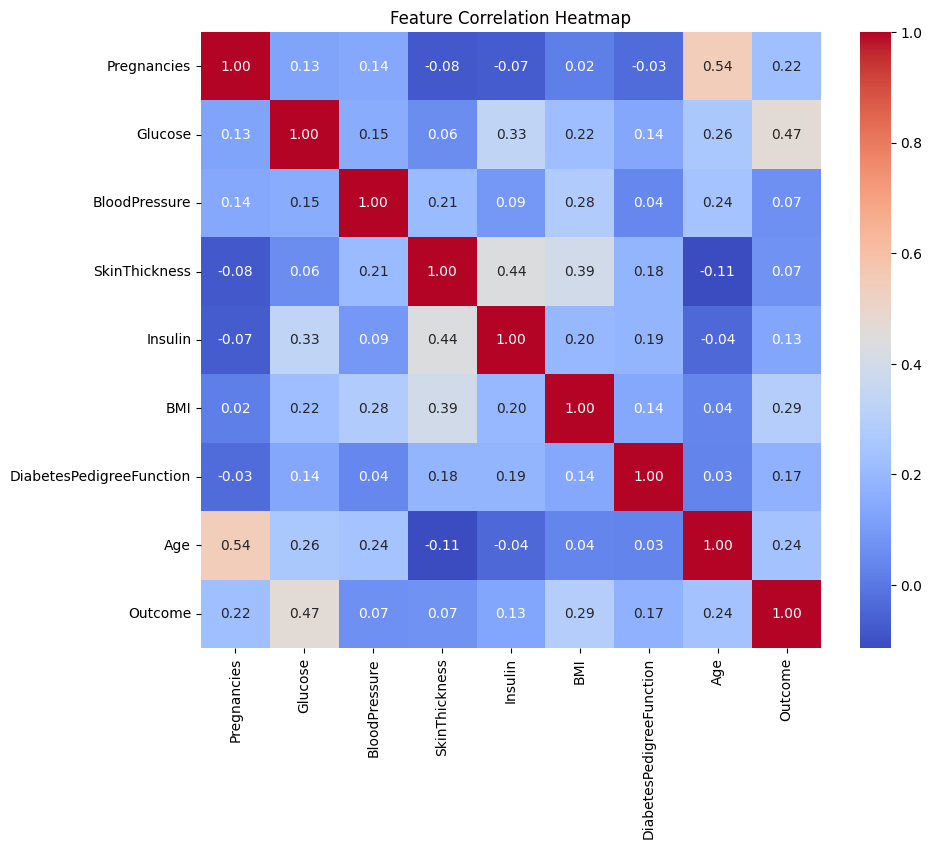

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

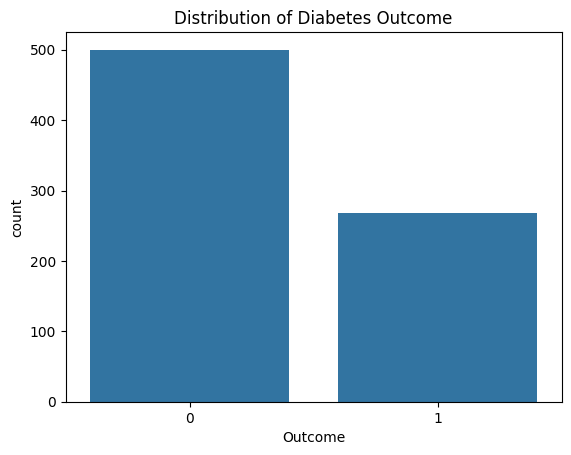

In [49]:
sns.countplot(data=df, x='Outcome')
plt.title("Distribution of Diabetes Outcome")
plt.show()

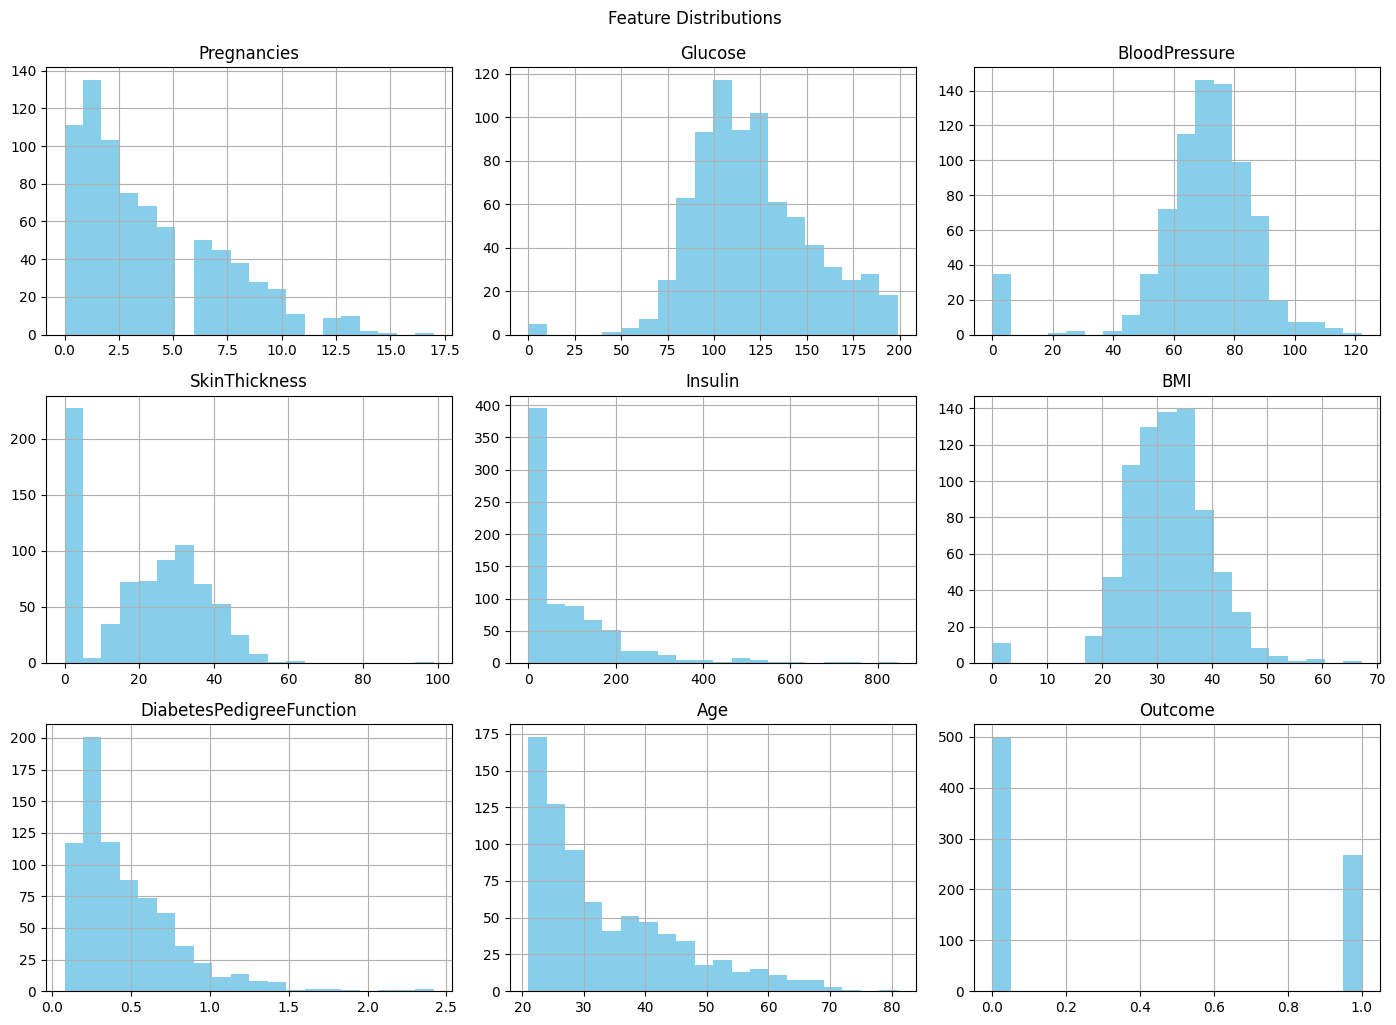

In [50]:
df.hist(bins=20, figsize=(14, 10), color='skyblue')
plt.tight_layout()
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

In [51]:
columns_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_zero] = df[columns_with_zero].replace(0, np.nan)

print("Missing values after replacing 0 with NaN:\n")
print(df.isnull().sum())


Missing values after replacing 0 with NaN:

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [52]:
df.fillna(df.median(numeric_only=True), inplace=True)

print("\nMissing values after imputation:\n")
print(df.isnull().sum())


Missing values after imputation:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [53]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [55]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (614, 8)
Testing set size: (154, 8)


In [56]:
knn = KNeighborsClassifier(n_neighbors=5)

In [57]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [58]:
y_pred = knn.predict(X_test)

In [59]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")

Accuracy:  0.6753
Precision: 0.5400
Recall:    0.5000


In [60]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[77 23]
 [27 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       100
           1       0.54      0.50      0.52        54

    accuracy                           0.68       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.68      0.67       154



In [61]:
param_grid = {'n_neighbors': list(range(1, 31))}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best k: {grid_search.best_params_['n_neighbors']}")

Best k: 17


In [62]:
best_k = grid_search.best_params_['n_neighbors']
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

y_pred_best = knn_best.predict(X_test)

In [63]:
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)

print(f"Improved Accuracy:  {accuracy:.4f}")
print(f"Improved Precision: {precision:.4f}")
print(f"Improved Recall:    {recall:.4f}")

Improved Accuracy:  0.6753
Improved Precision: 0.5417
Improved Recall:    0.4815


In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=best_k)
knn_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = knn_scaled.predict(X_test_scaled)

In [65]:
print("After Scaling:")
print("Accuracy :", accuracy_score(y_test, y_pred_scaled))
print("Precision:", precision_score(y_test, y_pred_scaled))
print("Recall   :", recall_score(y_test, y_pred_scaled))

After Scaling:
Accuracy : 0.7467532467532467
Precision: 0.6666666666666666
Recall   : 0.5555555555555556


In [66]:
param_grid = {'n_neighbors': list(range(1, 51, 2))}  # Only odd k's to avoid ties

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Best k value: {best_k}")

Best k value: 19


In [67]:
knn_alt = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')
knn_alt.fit(X_train_scaled, y_train)
y_pred_alt = knn_alt.predict(X_test_scaled)

print("Accuracy :", accuracy_score(y_test, y_pred_alt))
print("Precision:", precision_score(y_test, y_pred_alt))
print("Recall   :", recall_score(y_test, y_pred_alt))

Accuracy : 0.7597402597402597
Precision: 0.6976744186046512
Recall   : 0.5555555555555556


In [69]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)

In [70]:
print("Logistic Regression Results:")
print("Accuracy :", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall   :", recall_score(y_test, y_pred_logreg))

Logistic Regression Results:
Accuracy : 0.7077922077922078
Precision: 0.6
Recall   : 0.5


In [72]:
joblib.dump(knn_alt, 'knn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']